# 분산분석

- 두 개 이상의 다수 집단 간 평균을 비교하는 방법
- 종속변수는 연속형, 독립변수는 범주형

# 일원배치 분산분석
- 독립변수 1개(범주형)일때 변수의 영향을 알아보기 위함
- 표본의 수는 같지 않아도 됨
- F 통계량 이용
- 가정
    - 집단의 측정치는 서로 독립적, 정규분포를 따름
    - 집단 측정치의 분산은 같음(등분산 가정)
- 가설
    - H0 : k개의 집단 간 모평균에는 차이가 없다.
    - H1 : k개의 집단 간 모평균이 모두 같다고 할 수 없다.
- 사후검정
    - 귀무가설 기각시 어떤 집단들에 대해서 평균의 차이가 존재하는지 알아보는 검정
    - 던칸의 MRT, vltudml LSD, 튜키의 HSD 등이 있다.
- 단계
    - 교재 305p 참고

In [1]:
import scipy.stats as stats  
import pandas as pd
import os
os.listdir("/kaggle/input")

# 데이터 불러오기
Iris_data = pd.read_csv("/kaggle/input/adp-book-data/iris.csv")
Iris_data.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


-  종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균에 차이가 있는지 확인

In [9]:
Iris_data.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [10]:
target_list = Iris_data["target"].unique()
setosa = Iris_data[Iris_data["target"]==target_list[0]]["sepal width"]
versicolor = Iris_data[Iris_data["target"]==target_list[1]]["sepal width"]
virginica = Iris_data[Iris_data["target"]==target_list[2]]["sepal width"]
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


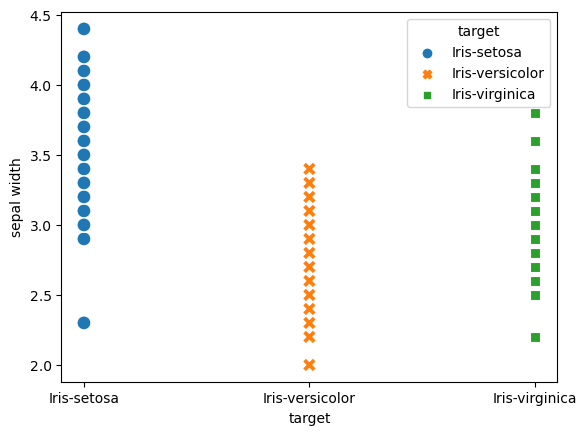

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=Iris_data)
plt.show()

In [12]:
# 정규성 검정
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


- 정규성 검정
    - H0 : 정규분포이다.
    - H1 : 정규분포가 아니다.
- 3개의 표본 모두 pvalue > 0.05이므로 정규성을 만족

In [13]:
# 등분산 검정
stats.levene(setosa,versicolor,virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

- 등분산 검정
    - H0 : 집단 간 분산이 같다.
    - H1 : 집단 간 분산이 다르다.
- pvalue > 0.05이므로 귀무가설을 채택하여 집단간 분산이 같음.

In [14]:
stats.f_oneway(setosa,versicolor,virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

- ANOVA 검정
    - H0 : 세가지 종에 대해 평균은 모두 같다
    - H1 : 적어도 하나의 종에 대해 평균에는 차이가 있다.
- pvalue가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 따라서, 평균에 차이가 있다.

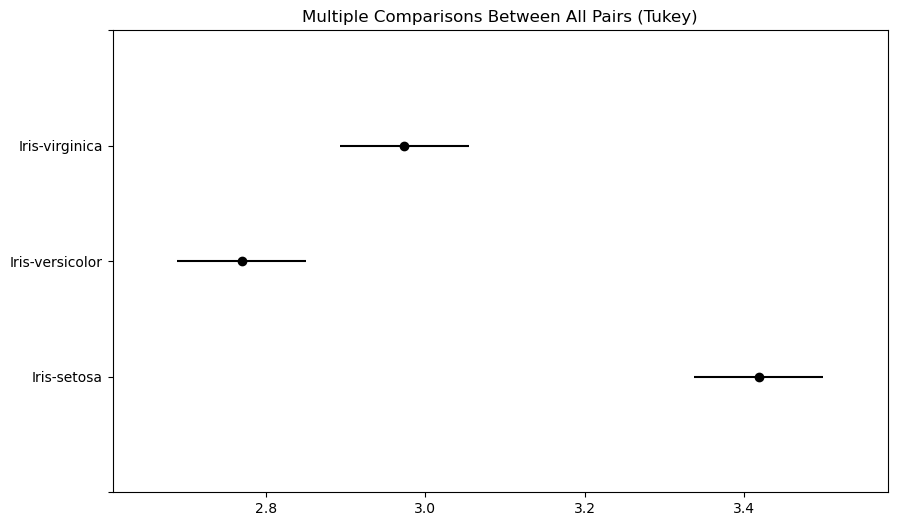

In [15]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data= Iris_data["sepal width"], groups=Iris_data["target"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [22]:
tuekeyhsd.summary()
# diff : 오른쪽 집단 - 왼쪽 집단 차이
# setosa - versicolor => 음수
# versicolor일 때보다 setosa 일 때 값이 큼

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


- 두 집단씩 짝을지어 다중비교를 수행
    - H0 : 집단들 사이의 평균은 같다.
    - H1 : 집단들 사이의 평균은 같지 않다.
- pvalue(p-adj)를 확인한 결과, 세 가지 비교 모두 0.05보다 작으므로 각각의 비교에 대한 귀무가설을 모두 기각함. 즉, 모든 종들에 대해서 평균값에 차이가 있다.



In [17]:
# 정규성을 만족하지 못했을 때, 크루스칼 왈리스 검정 수행

stats.kruskal(setosa,versicolor,virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [21]:
# 정규성은 만족하나, 등분산성을 만족하지 못했을때 welch_anova 수행

# !pip install pingouin 
# conda install pingouin

import pingouin as pg
pg.welch_anova(data = Iris_data, dv ='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


# 이원배치 분산분석
- 하나의 연속형 종속변수에 대한 두 개의 범주형 독립변수 A, B의 영향을 알아보기 위해 사용됨
- ex. 성별과 학년에 따른 시험 점수의 차이 검정
- 교호작용(두 독립변수의 조합)에 대한 검증이 반드시 필요
- 가설은 총 6가지
- 

In [4]:
# 데이터 불러오기
import pandas as pd
mtcars = pd.read_csv('/kaggle/input/adp-book-data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
## cyl, am, mpg 변수들로만 구성된 분석용 데이터셋 생성 
mtcars = mtcars[["mpg","am","cyl"]].copy()
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [8]:
mtcars.head()

,mpg,am,cyl
0,21.0,1,6
1,21.0,1,6
2,22.8,1,4
3,21.4,0,6
4,18.7,0,8


In [25]:
## 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


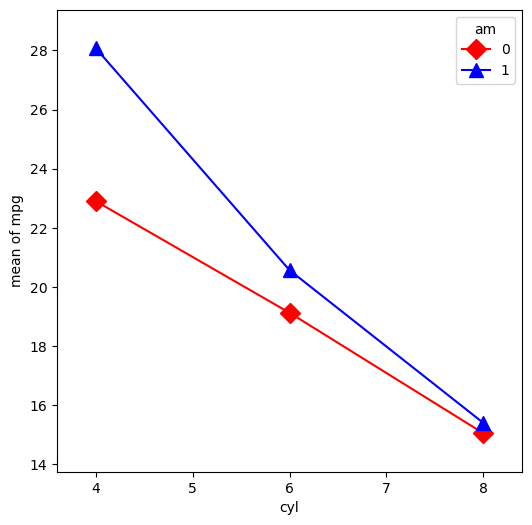

In [26]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

## 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl,am, mpg,
                       colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)